In [1]:
import numpy as np
from python.structure import Atom, Cell
from python.potentials import EAMAl1Potential
from python.mechanics import StressCalculator
from python.optimizers import LBFGSOptimizer
from python.visualization import Visualizer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# 创建基本BCC晶胞
a0 = 4.05  # 晶格常数，单位：Å
lattice_vectors = np.array([[a0, 0.0, 0.0], [0.0, a0, 0.0], [0.0, 0.0, a0]])

# BCC原子位置（分数坐标）
positions = [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]]  # 顶角原子  # 体心原子

# 创建原子列表，转换到笛卡尔坐标
atoms = []
for i, frac_pos in enumerate(positions):
    cart_pos = np.dot(frac_pos, lattice_vectors)
    atoms.append(Atom(id=i, symbol="Al", mass_amu=26.98, position=cart_pos))

# 创建基本晶胞并构建超胞
cell = Cell(lattice_vectors=lattice_vectors, atoms=atoms, pbc_enabled=True)
supercell = cell.build_supercell((2, 2, 2))

In [3]:
all_pos = supercell.get_positions()
print(all_pos)

[[0.    0.    0.   ]
 [2.025 2.025 2.025]
 [0.    0.    4.05 ]
 [2.025 2.025 6.075]
 [0.    4.05  0.   ]
 [2.025 6.075 2.025]
 [0.    4.05  4.05 ]
 [2.025 6.075 6.075]
 [4.05  0.    0.   ]
 [6.075 2.025 2.025]
 [4.05  0.    4.05 ]
 [6.075 2.025 6.075]
 [4.05  4.05  0.   ]
 [6.075 6.075 2.025]
 [4.05  4.05  4.05 ]
 [6.075 6.075 6.075]]


INFO:python.visualization:Plotting crystal structure.
DEBUG:python.visualization:Plotted atoms with single element: Al
DEBUG:python.visualization:Plotted lattice vector v1: [8.1 0.  0. ]
DEBUG:python.visualization:Plotted lattice vector v2: [0.  8.1 0. ]
DEBUG:python.visualization:Plotted lattice vector v3: [0.  0.  8.1]
DEBUG:python.visualization:Setting equal aspect ratio for axes.
DEBUG:python.visualization:Axes limits set to origin: [-0.44296875 -0.44296875 -0.44296875], size: 6.9609375


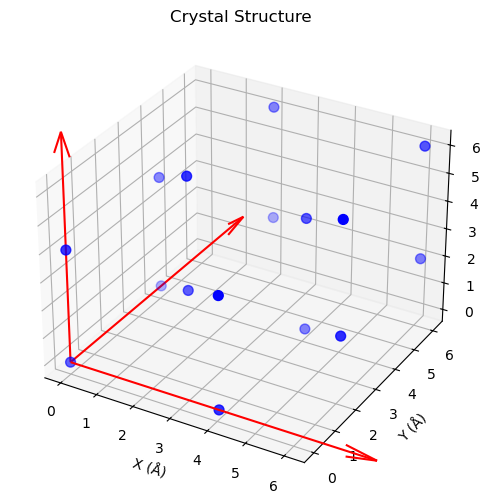

INFO:python.visualization:Crystal structure plot completed.


(<Figure size 800x600 with 1 Axes>,
 <Axes3D: title={'center': 'Crystal Structure'}, xlabel='X (Å)', ylabel='Y (Å)', zlabel='Z (Å)'>)

In [4]:
vis = Visualizer()
vis.plot_cell_structure(cell_structure=supercell, show=True)

In [5]:
# 创建两个优化器，使用不同的参数
# 粗优化：使用宽松的标准
coarse_optimizer = LBFGSOptimizer(
    ftol=1e-5,  # 比默认值宽松
    gtol=1e-4,  # 比默认值宽松
    maxiter=1000,  # 较少的迭代次数
    maxls=50,  # 较多的线搜索步数
)

# 精优化：使用严格的标准
fine_optimizer = LBFGSOptimizer(
    ftol=1e-8,  # 比默认值严格
    gtol=1e-5,  # 比默认值严格
    maxls=100,  # 较多的线搜索步数
    maxiter=10000,  # 允许更多迭代
)

potential = EAMAl1Potential()
stress_calculator = StressCalculator()

DEBUG:python.potentials:EAM Al1 Potential initialized with cutoff=6.5.
DEBUG:python.mechanics:Initialized StressCalculator with C++ interface


In [6]:
# 优化初始结构（两阶段优化）
print("Optimizing initial structure (coarse stage)...")
converged, _ = coarse_optimizer.optimize(supercell, potential)
if not converged:
    print("Initial coarse optimization did not converge!")

print("Optimizing initial structure (fine stage)...")
converged, _ = fine_optimizer.optimize(supercell, potential)
if not converged:
    print("Initial fine optimization did not converge!")




DEBUG:python.potentials:Calculated EAM potential energy: -37.98066712514711 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -39.39604497673554 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -37.435446541989116 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -39.3960449780135 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -39.396044979292135 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -42.107907346413356 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -41.615106474637976 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -42.254862870089504 eV.
DEBUG:python.optimizers:Callback at iteration 1
DEBUG:python.potentials:Calculated EAM potential energy: -38.90985627388882 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -42.25486287056876 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -42.25486287799305 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -41.0490749

Optimizing initial structure (coarse stage)...
Optimizing initial structure (fine stage)...


DEBUG:python.potentials:Calculated EAM potential energy: -46.54267810633472 eV.
DEBUG:python.optimizers:Callback at iteration 3
DEBUG:python.potentials:Calculated EAM potential energy: -46.5426824105261 eV.
DEBUG:python.optimizers:Callback at iteration 4
DEBUG:python.potentials:Calculated EAM potential energy: -46.542684188371254 eV.
DEBUG:python.optimizers:Callback at iteration 5
DEBUG:python.potentials:Calculated EAM potential energy: -46.54268432319702 eV.
DEBUG:python.optimizers:Callback at iteration 6
INFO:python.optimizers:L-BFGS Optimizer converged successfully.
DEBUG:python.optimizers:L-BFGS Optimizer final positions:
[[0.93105402 0.93105402 0.93105402]
 [2.36949445 2.36949445 2.36949444]
 [0.84419595 0.84419595 3.74752933]
 [2.40467712 2.40467712 5.62992641]
 [0.84419595 3.74752933 0.84419595]
 [2.40467712 5.62992641 2.40467712]
 [0.44507359 3.67032288 3.67032288]
 [2.32747067 5.23080405 5.23080405]
 [3.74752933 0.84419595 0.84419595]
 [5.62992641 2.40467712 2.40467712]
 [3.67

In [7]:
strains = 0.01
deform_type ="xx"
F_generator = lambda e: np.array([[1 + e, 0, 0], [0, 1, 0], [0, 0, 1]])
print(F_generator(strains))


[[1.01 0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


INFO:python.visualization:Plotting crystal structure.
DEBUG:python.visualization:Plotted atoms with single element: Al
DEBUG:python.visualization:Plotted lattice vector v1: [8.1 0.  0. ]
DEBUG:python.visualization:Plotted lattice vector v2: [0.  8.1 0. ]
DEBUG:python.visualization:Plotted lattice vector v3: [0.  0.  8.1]
DEBUG:python.visualization:Setting equal aspect ratio for axes.
DEBUG:python.visualization:Axes limits set to origin: [-0.41051547 -0.41051547 -0.41051547], size: 6.450957344967249


[[0.93105402 0.93105402 0.93105402]
 [2.36949445 2.36949445 2.36949444]
 [0.84419595 0.84419595 3.74752933]
 [2.40467712 2.40467712 5.62992641]
 [0.84419595 3.74752933 0.84419595]
 [2.40467712 5.62992641 2.40467712]
 [0.44507359 3.67032288 3.67032288]
 [2.32747067 5.23080405 5.23080405]
 [3.74752933 0.84419595 0.84419595]
 [5.62992641 2.40467712 2.40467712]
 [3.67032288 0.44507359 3.67032288]
 [5.23080405 2.32747067 5.23080405]
 [3.67032288 3.67032288 0.44507359]
 [5.23080405 5.23080405 2.32747067]
 [3.70550555 3.70550556 3.70550555]
 [5.14394598 5.14394598 5.14394598]]


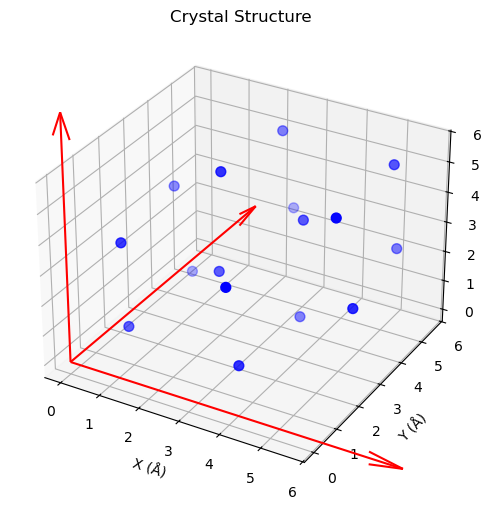

INFO:python.visualization:Crystal structure plot completed.


(<Figure size 800x600 with 1 Axes>,
 <Axes3D: title={'center': 'Crystal Structure'}, xlabel='X (Å)', ylabel='Y (Å)', zlabel='Z (Å)'>)

In [8]:
print(supercell.get_positions())
vis.plot_cell_structure(cell_structure=supercell,show=True)

DEBUG:python.structure:Applying deformation to lattice vectors and atomic positions.
DEBUG:python.structure:Updated lattice vectors:
[[8.181 0.    0.   ]
 [0.    8.1   0.   ]
 [0.    0.    8.1  ]]
DEBUG:python.structure:Updated cell volume: 536.7554100000001
INFO:python.visualization:Plotting crystal structure.
DEBUG:python.visualization:Plotted atoms with single element: Al
DEBUG:python.visualization:Plotted lattice vector v1: [8.181 0.    0.   ]
DEBUG:python.visualization:Plotted lattice vector v2: [0.  8.1 0. ]
DEBUG:python.visualization:Plotted lattice vector v3: [0.  0.  8.1]
DEBUG:python.visualization:Setting equal aspect ratio for axes.
DEBUG:python.visualization:Axes limits set to origin: [-0.41462062 -0.44277025 -0.44277025], size: 6.515466916538448


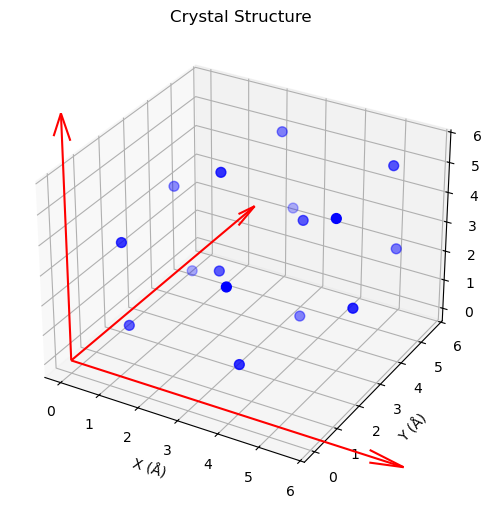

INFO:python.visualization:Crystal structure plot completed.


[[0.94036457 0.93105402 0.93105402]
 [2.39318939 2.36949445 2.36949444]
 [0.85263791 0.84419595 3.74752933]
 [2.42872389 2.40467712 5.62992641]
 [0.85263791 3.74752933 0.84419595]
 [2.42872389 5.62992641 2.40467712]
 [0.44952433 3.67032288 3.67032288]
 [2.35074538 5.23080405 5.23080405]
 [3.78500462 0.84419595 0.84419595]
 [5.68622567 2.40467712 2.40467712]
 [3.70702611 0.44507359 3.67032288]
 [5.28311209 2.32747067 5.23080405]
 [3.70702611 3.67032288 0.44507359]
 [5.28311209 5.23080405 2.32747067]
 [3.74256061 3.70550556 3.70550555]
 [5.19538544 5.14394598 5.14394598]]


In [9]:
deformed_cell = supercell.copy()
deformed_cell.apply_deformation(F_generator(strains))
vis.plot_cell_structure(cell_structure=deformed_cell, show=True)
print(deformed_cell.get_positions())

In [10]:
initial_stress_basic = stress_calculator.calculate_stress_basic(supercell,potential=potential)
forces_sup = supercell.get_forces()
Fx_total = np.sum(forces_sup[:, 0])  # 对所有原子x方向力求和
Fy_total = np.sum(forces_sup[:, 1])  # 对所有原子y方向力求和
Fz_total = np.sum(forces_sup[:, 2])  # 对所有原子z方向力求和

print("Fx_total =", Fx_total)
print("Fy_total =", Fy_total)
print("Fz_total =", Fz_total)


DEBUG:python.mechanics:Starting basic stress calculation.
DEBUG:python.mechanics:num_atoms: 16
DEBUG:python.mechanics:volume: 531.4410000000003
DEBUG:python.mechanics:Computed basic stress_tensor: [[2.06583826e-06 2.00136712e-07 2.00137613e-07]
 [2.00134385e-07 2.06584347e-06 2.00138223e-07]
 [2.00134650e-07 2.00137600e-07 2.06584500e-06]]


Fx_total = 2.0122792321330962e-16
Fy_total = 1.0408340855860843e-16
Fz_total = -3.1008182133085427e-16


In [11]:
finally_stress_basic = stress_calculator.calculate_stress_basic(deformed_cell,potential=potential)
forces_def = deformed_cell.get_forces()
Fx_total = np.sum(forces_def[:, 0])  # 对所有原子x方向力求和
Fy_total = np.sum(forces_def[:, 1])  # 对所有原子y方向力求和
Fz_total = np.sum(forces_def[:, 2])  # 对所有原子z方向力求和

print("Fx_total =", Fx_total)
print("Fy_total =", Fy_total)
print("Fz_total =", Fz_total)

DEBUG:python.mechanics:Starting basic stress calculation.
DEBUG:python.mechanics:num_atoms: 16
DEBUG:python.mechanics:volume: 536.7554100000001
DEBUG:python.mechanics:Computed basic stress_tensor: [[-2.00210218e-03 -8.48908195e-05 -8.48908185e-05]
 [-1.62707565e-04 -9.84735954e-04 -1.73836688e-04]
 [-1.62707564e-04 -1.73836689e-04 -9.84735952e-04]]


Fx_total = -1.249000902703301e-16
Fy_total = 1.1102230246251565e-16
Fz_total = -1.5265566588595902e-16


In [12]:
initial_stress = stress_calculator.get_all_stress_components(supercell, potential=potential)
print("initial_stress : ", initial_stress)

DEBUG:python.mechanics:Starting total stress calculation.
DEBUG:python.mechanics:Starting basic stress calculation.
DEBUG:python.mechanics:num_atoms: 16
DEBUG:python.mechanics:volume: 531.4410000000003
DEBUG:python.mechanics:Computed basic stress_tensor: [[2.06583826e-06 2.00136712e-07 2.00137613e-07]
 [2.00134385e-07 2.06584347e-06 2.00138223e-07]
 [2.00134650e-07 2.00137600e-07 2.06584500e-06]]
DEBUG:python.mechanics:Starting lattice stress calculation.
DEBUG:python.mechanics:Created deep copy of cell for deformation.
DEBUG:python.mechanics:Calculating derivative for component (0, 0).
DEBUG:python.structure:Applying deformation to lattice vectors and atomic positions.
DEBUG:python.structure:Updated lattice vectors:
[[8.1000081 0.        0.       ]
 [0.        8.1       0.       ]
 [0.        0.        8.1      ]]
DEBUG:python.structure:Updated cell volume: 531.4415314410003
DEBUG:python.potentials:Calculated EAM potential energy: -46.54267630154208 eV.
DEBUG:python.mechanics:Energy a

initial_stress :  {'basic': array([[2.06583826e-06, 2.00136712e-07, 2.00137613e-07],
       [2.00134385e-07, 2.06584347e-06, 2.00138223e-07],
       [2.00134650e-07, 2.00137600e-07, 2.06584500e-06]]), 'lattice': array([[ 1.50940751e-02, -2.00565097e-07, -2.01888739e-07],
       [-1.99060959e-07,  1.50940745e-02, -1.98900518e-07],
       [-2.03633539e-07, -2.00498247e-07,  1.50940748e-02]]), 'total': array([[ 1.50961409e-02, -4.28385455e-10, -1.75112524e-09],
       [ 1.07342583e-09,  1.50961403e-02,  1.23770569e-09],
       [-3.49888835e-09, -3.60647044e-10,  1.50961407e-02]])}


In [13]:
medium_stress = stress_calculator.get_all_stress_components(deformed_cell, potential=potential)
print("medium_stress : ", medium_stress)

DEBUG:python.mechanics:Starting total stress calculation.
DEBUG:python.mechanics:Starting basic stress calculation.
DEBUG:python.mechanics:num_atoms: 16
DEBUG:python.mechanics:volume: 536.7554100000001
DEBUG:python.mechanics:Computed basic stress_tensor: [[-2.00210218e-03 -8.48908195e-05 -8.48908185e-05]
 [-1.62707565e-04 -9.84735954e-04 -1.73836688e-04]
 [-1.62707564e-04 -1.73836689e-04 -9.84735952e-04]]
DEBUG:python.mechanics:Starting lattice stress calculation.
DEBUG:python.mechanics:Created deep copy of cell for deformation.
DEBUG:python.mechanics:Calculating derivative for component (0, 0).
DEBUG:python.structure:Applying deformation to lattice vectors and atomic positions.
DEBUG:python.structure:Updated lattice vectors:
[[8.18100818 0.         0.        ]
 [0.         8.1        0.        ]
 [0.         0.         8.1       ]]
DEBUG:python.structure:Updated cell volume: 536.7559467554102
DEBUG:python.potentials:Calculated EAM potential energy: -46.45816394623033 eV.
DEBUG:python.

medium_stress :  {'basic': array([[-2.00210218e-03, -8.48908195e-05, -8.48908185e-05],
       [-1.62707565e-04, -9.84735954e-04, -1.73836688e-04],
       [-1.62707564e-04, -1.73836689e-04, -9.84735952e-04]]), 'lattice': array([[1.66930830e-02, 1.62706253e-04, 1.62707404e-04],
       [8.48918649e-05, 1.58958991e-02, 1.73835828e-04],
       [8.48905014e-05, 1.73834643e-04, 1.58958996e-02]]), 'total': array([[ 1.46909808e-02,  7.78154331e-05,  7.78165858e-05],
       [-7.78157000e-05,  1.49111632e-02, -8.60529929e-10],
       [-7.78170631e-05, -2.04592631e-09,  1.49111636e-02]])}


In [14]:
final_cell = deformed_cell.copy()
# 优化初始结构（两阶段优化）
print("Optimizing initial structure (coarse stage)...")
converged, _ = coarse_optimizer.optimize(final_cell, potential)
if not converged:
    print("Initial coarse optimization did not converge!")

print("Optimizing initial structure (fine stage)...")
converged, _ = fine_optimizer.optimize(final_cell, potential)
if not converged:
    print("Initial fine optimization did not converge!")

DEBUG:python.potentials:Calculated EAM potential energy: -46.45817290637582 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -41.307819321540464 eV.
DEBUG:python.potentials:Calculated EAM potential energy: -46.46110068528236 eV.
DEBUG:python.optimizers:Callback at iteration 14
DEBUG:python.potentials:Calculated EAM potential energy: -46.46373594081915 eV.
DEBUG:python.optimizers:Callback at iteration 15
DEBUG:python.potentials:Calculated EAM potential energy: -46.464498257526586 eV.
DEBUG:python.optimizers:Callback at iteration 16
DEBUG:python.potentials:Calculated EAM potential energy: -46.46495062258869 eV.
DEBUG:python.optimizers:Callback at iteration 17
INFO:python.optimizers:L-BFGS Optimizer converged successfully.
DEBUG:python.optimizers:L-BFGS Optimizer final positions:
[[0.95809544 0.93554853 0.93554853]
 [2.39059604 2.37404496 2.37404496]
 [0.8738135  0.84831166 3.74480304]
 [2.43549228 2.4057315  5.62015547]
 [0.8738135  3.74480304 0.84831166]
 [2.43549228 5.62015

Optimizing initial structure (coarse stage)...
Optimizing initial structure (fine stage)...


In [15]:
final_stress = stress_calculator.get_all_stress_components(final_cell, potential=potential)
print("final_stress : ", final_stress)

DEBUG:python.mechanics:Starting total stress calculation.
DEBUG:python.mechanics:Starting basic stress calculation.
DEBUG:python.mechanics:num_atoms: 16
DEBUG:python.mechanics:volume: 536.7554100000001
DEBUG:python.mechanics:Computed basic stress_tensor: [[-0.0008862   0.00035129  0.00035129]
 [-0.00043056 -0.00046896  0.00036906]
 [-0.00043056  0.00036906 -0.00046896]]
DEBUG:python.mechanics:Starting lattice stress calculation.
DEBUG:python.mechanics:Created deep copy of cell for deformation.
DEBUG:python.mechanics:Calculating derivative for component (0, 0).
DEBUG:python.structure:Applying deformation to lattice vectors and atomic positions.
DEBUG:python.structure:Updated lattice vectors:
[[8.18100818 0.         0.        ]
 [0.         8.1        0.        ]
 [0.         0.         8.1       ]]
DEBUG:python.structure:Updated cell volume: 536.7559467554102
DEBUG:python.potentials:Calculated EAM potential energy: -46.476454140041284 eV.
DEBUG:python.mechanics:Energy after positive def

final_stress :  {'basic': array([[-0.0008862 ,  0.00035129,  0.00035129],
       [-0.00043056, -0.00046896,  0.00036906],
       [-0.00043056,  0.00036906, -0.00046896]]), 'lattice': array([[ 0.0110436 ,  0.00043056,  0.00043056],
       [-0.00035129,  0.01675795, -0.00036906],
       [-0.00035129, -0.00036906,  0.01675795]]), 'total': array([[ 1.01574048e-02,  7.81853009e-04,  7.81851036e-04],
       [-7.81851508e-04,  1.62889887e-02, -1.45038783e-09],
       [-7.81853163e-04,  1.54266584e-09,  1.62889899e-02]])}


In [16]:
print("basic stresses: \n", initial_stress['basic'], "\n", medium_stress['basic'], "\n", final_stress['basic'])
print("lattice stresses: \n", initial_stress['lattice'], "\n", medium_stress['lattice'], "\n", final_stress['lattice'])
print("total stresses: \n", initial_stress['total'], "\n", medium_stress['total'], "\n", final_stress['total'])

basic stresses: 
 [[2.06583826e-06 2.00136712e-07 2.00137613e-07]
 [2.00134385e-07 2.06584347e-06 2.00138223e-07]
 [2.00134650e-07 2.00137600e-07 2.06584500e-06]] 
 [[-2.00210218e-03 -8.48908195e-05 -8.48908185e-05]
 [-1.62707565e-04 -9.84735954e-04 -1.73836688e-04]
 [-1.62707564e-04 -1.73836689e-04 -9.84735952e-04]] 
 [[-0.0008862   0.00035129  0.00035129]
 [-0.00043056 -0.00046896  0.00036906]
 [-0.00043056  0.00036906 -0.00046896]]
lattice stresses: 
 [[ 1.50940751e-02 -2.00565097e-07 -2.01888739e-07]
 [-1.99060959e-07  1.50940745e-02 -1.98900518e-07]
 [-2.03633539e-07 -2.00498247e-07  1.50940748e-02]] 
 [[1.66930830e-02 1.62706253e-04 1.62707404e-04]
 [8.48918649e-05 1.58958991e-02 1.73835828e-04]
 [8.48905014e-05 1.73834643e-04 1.58958996e-02]] 
 [[ 0.0110436   0.00043056  0.00043056]
 [-0.00035129  0.01675795 -0.00036906]
 [-0.00035129 -0.00036906  0.01675795]]
total stresses: 
 [[ 1.50961409e-02 -4.28385455e-10 -1.75112524e-09]
 [ 1.07342583e-09  1.50961403e-02  1.23770569e-09]


In [17]:
print("stress change", final_stress['total'] - initial_stress['total'])

stress change [[-4.93873612e-03  7.81853438e-04  7.81852787e-04]
 [-7.81852581e-04  1.19284836e-03 -2.68809352e-09]
 [-7.81849664e-04  1.90331289e-09  1.19284916e-03]]
